<a href="https://colab.research.google.com/github/TarefBilel/101_Food_Classification_CNN/blob/main/Code_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Importing the technologies

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# 2.Getting the data

In [ ]:
dataset_list= tfds.list_builders()
print("food101" in dataset_list)

True


In [ ]:
(train_data,test_data), ds_info= tfds.load(name="food101",
                                           split=["train","validation"],
                                            as_supervised=True,
                                           shuffle_files=True,
                                           with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.QLQZKM_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.QLQZKM_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


# 3.Becoming one with the data

In [ ]:
ds_info, ds_info.features

(tfds.core.DatasetInfo(
     name='food101',
     full_name='food101/2.0.0',
     description="""
     This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
     """,
     homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
     data_dir='/root/tensorflow_datasets/food101/2.0.0',
     file_format=tfrecord,
     download_size=4.65 GiB,
     dataset_size=4.77 GiB,
     features=FeaturesDict({
         'image': Image(shape=(None, None, 3), dtype=uint8),
         'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
     }),
     supervised_keys=('image', 'label'),
     disable_shuffling=False,
     nondeterministic_orde

In [ ]:
classes_name= ds_info.features["label"].names

In [ ]:
classes_name

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
train_data_one_sample= train_data.take(1)

In [ ]:
train_data_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_data_one_sample:
 print(f"""Image shape:{image.shape}
          Image dtype:{image.dtype}
          Target label:{label}
          Class name:{classes_name[label]}
      """)

Image shape:(512, 512, 3)
          Image dtype:<dtype: 'uint8'>
          Target label:31
          Class name:donuts
      


In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[131,  86,  55],
        [134,  89,  58],
        [137,  92,  61],
        ...,
        [131,  44,   0],
        [135,  49,   2],
        [138,  52,   5]],

       [[134,  89,  58],
        [135,  90,  59],
        [135,  90,  59],
        ...,
        [133,  46,   1],
        [134,  48,   1],
        [134,  48,   1]],

       [[136,  91,  60],
        [137,  92,  61],
        [139,  94,  63],
        ...,
        [137,  53,   7],
        [135,  51,   5],
        [131,  47,   1]],

       ...,

       [[130,  23,   3],
        [134,  31,  14],
        [132,  36,  24],
        ...,
        [243, 248, 242],
        [243, 248, 242],
        [243, 248, 242]],

       [[128,  22,   0],
        [129,  26,   7],
        [124,  28,  14],
        ...,
        [243, 248, 241],
        [242, 247, 240],
        [242, 247, 240]],

       [[132,  26,   2],
        [133,  31,   9],
        [126,  29,  13],
        ...,
        [242, 247, 24

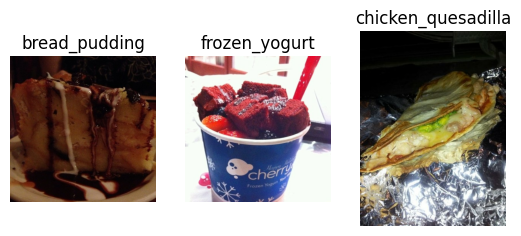

In [ ]:
for i, (image, label) in enumerate(train_data.take(3)):
  plt.subplot(1, 3, i + 1)
  plt.imshow(image)
  plt.title(classes_name[label])
  plt.axis(False)

# 4.Creating preprocessing funcion to our dataset

In [ ]:
def preprocess_img(image,label):
 image=tf.image.resize(image,size=[224, 224])
 image=tf.cast(image,dtype=tf.float32), label
 return image



In [ ]:
preprocessed_img= preprocess_img(image=image,label=label)[0]

In [ ]:
print(f"Image before pre:{image[:2]}\n shape:{image.shape}\n dtype:{image.dtype}\n")
print(f"Image after pre:{preprocessed_img[:2]}\n shape:{preprocessed_img.shape}\n dtype:{preprocessed_img.dtype}\n")

Image before pre:[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 7  7  5]
  [11 11  9]
  [14 14 12]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 5  5  3]
  [ 8  8  6]
  [11 11  9]]]
 shape:(512, 384, 3)
 dtype:<dtype: 'uint8'>

Image after pre:[[[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 7.7907934  7.7907934  5.7907934]
  [ 5.714286   5.714286   3.7142856]
  [10.999987  10.999987   8.999987 ]]

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 6.770399   6.770399   4.770399 ]
  [ 6.790833   6.790833   4.790833 ]
  [10.1887665 10.1887665  8.1887665]]]
 shape:(224, 224, 3)
 dtype:<dtype: 'float32'>



# 5.Batch and prepare dataset

In [ ]:
train_data=train_data.map(preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
# Same thing for the test data
test_data=test_data.map(preprocess_img,num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# 6.Creating modelling callbacks

In [ ]:
checkpoint_path= "/content/drive/MyDrive/Deep_Learning(Tuto)/101_Food_Classification/checkpoints/cp.weights.h5"
model_checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                     monitor="val_acc",
                                                     save_best_only=True,
                                                     save_weights_only=True,
                                                     verbose=0)

# 7.Setup mixed precision training

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

# 8.Feature Extraction model

In [ ]:
base_model_0= tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model_0.trainable=False

inputs= tf.keras.layers.Input(shape=(224, 224, 3))
x= base_model_0(inputs,training=False)
x= tf.keras.layers.GlobalAveragePooling2D()(x)
x= tf.keras.layers.Dense(101)(x)

outputs= tf.keras.layers.Activation("softmax",dtype=tf.float32)(x)

model_0= tf.keras.Model(inputs, outputs)

model_0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 101)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,048,693 (23.07 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
for layer in model_0.layers[1].layers:
  print( layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer False float32 <DTypePolicy "mixed_float16">
rescaling False float32 <DTypePolicy "mixed_float16">
normalization False float32 <DTypePolicy "mixed_float16">
stem_conv False float32 <DTypePolicy "mixed_float16">
stem_bn False float32 <DTypePolicy "mixed_float16">
stem_activation False float32 <DTypePolicy "mixed_float16">
block1a_project_conv False float32 <DTypePolicy "mixed_float16">
block1a_project_bn False float32 <DTypePolicy "mixed_float16">
block1a_project_activation False float32 <DTypePolicy "mixed_float16">
block2a_expand_conv False float32 <DTypePolicy "mixed_float16">
block2a_expand_bn False float32 <DTypePolicy "mixed_float16">
block2a_expand_activation False float32 <DTypePolicy "mixed_float16">
block2a_project_conv False float32 <DTypePolicy "mixed_float16">
block2a_project_bn False float32 <DTypePolicy "mixed_float16">
block2b_expand_conv False float32 <DTypePolicy "mixed_float16">
block2b_expand_bn False float32 <DTypePolicy "mixed_float16">
block2b_expand_ac

In [ ]:
history_base_0=model_0.fit(train_data,
               epochs=5,
               steps_per_epoch=len(train_data),
               validation_data=test_data,
               validation_steps=len(test_data),
               callbacks=[model_checkpoint])

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4594 - loss: 2.3550

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 328s 114ms/step - accuracy: 0.4594 - loss: 2.3548 - val_accuracy: 0.6890 - val_loss: 1.1785
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 214s 89ms/step - accuracy: 0.6537 - loss: 1.3508 - val_accuracy: 0.7140 - val_loss: 1.0634
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 303s 107ms/step - accuracy: 0.6883 - loss: 1.2015 - val_accuracy: 0.7258 - val_loss: 1.0093
Epoch 4/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 228s 92ms/step - accuracy: 0.7126 - loss: 1.0915 - val_accuracy: 0.7374 - val_loss: 0.9712
Epoch 5/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 248s 104ms/step - accuracy: 0.7249 - loss: 1.0353 - val_accuracy: 0.7366 - val_loss: 0.9624


# 9.Saving and loading the model

In [ ]:
model_0.save(filepath="/content/drive/MyDrive/Deep_Learning(Tuto)/101_Food_Classification/Models/Model_0.h5")

load_model_0= tf.keras.models.load_model(filepath="/content/drive/MyDrive/Deep_Learning(Tuto)/101_Food_Classification/Models/Model_0.h5")

In [ ]:
load_model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 101)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,048,699 (23.07 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 6 (36.00 B)

# 10.Plotting the history

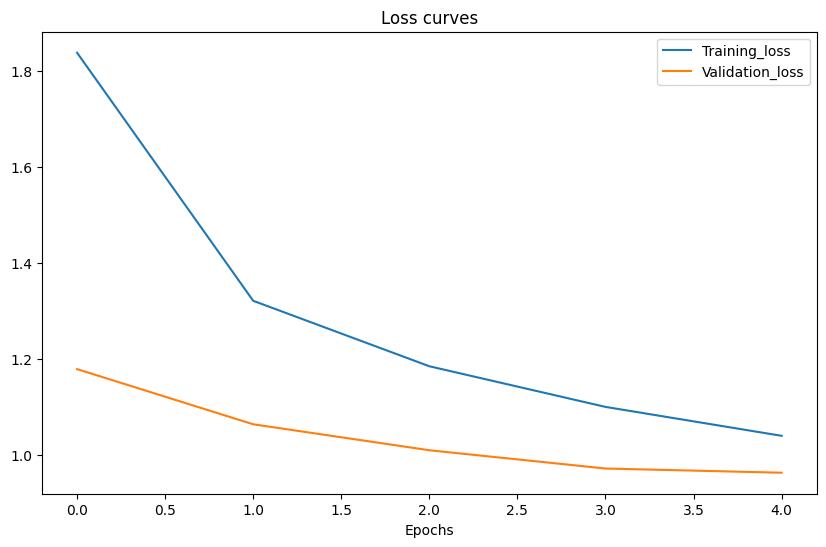

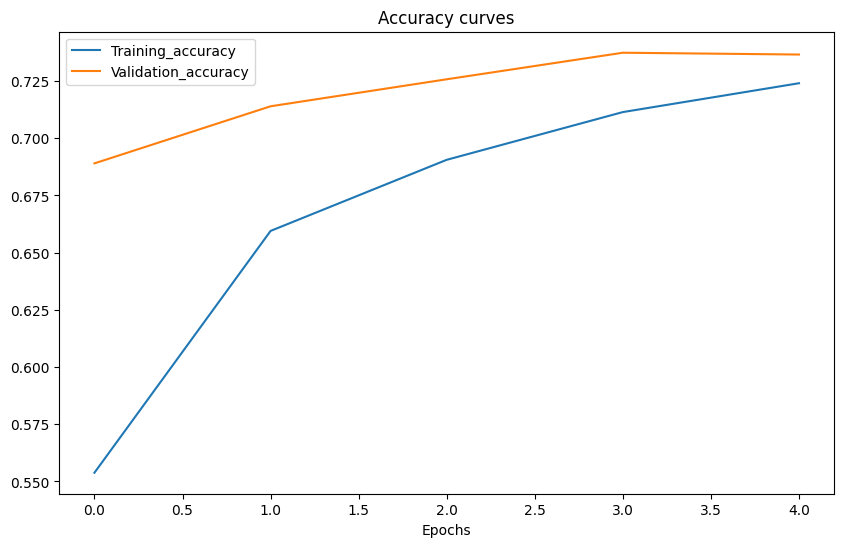

In [ ]:
history_0= history_base_0.history

plt.figure(figsize=(10,6))
plt.plot(history_0["loss"],label="Training_loss")
plt.plot(history_0["val_loss"],label="Validation_loss")
plt.title("Loss curves")
plt.xlabel("Epochs")
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(history_0["accuracy"],label="Training_accuracy")
plt.plot(history_0["val_accuracy"],label="Validation_accuracy")
plt.title("Accuracy curves")
plt.xlabel("Epochs")
plt.legend()

# 11.Fine_Tuning our model

In [ ]:
base_model_0.trainable=False

for layer in base_model_0.layers[-20:]:
  layer.trainable=True

model_0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
for layer in model_0.layers[1].layers:
  print(layer.name, layer.trainable)

input_layer False
rescaling False
normalization False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv False
block3a_expand_bn False
block3a_expand_activation False
block3a_project_conv False
block3a_project_bn False
block3b_expand_conv False
block3b_expand_bn False
block3b_expand_activation False
block3b_project_conv False
block3b_project_bn False
block3b_drop False
block3b_add False
block4a_expand_conv False
block4a_expand_bn False
block4a_expand_activation False
block4a_dwconv2 False
block4a_bn False
block4a_activation False
block4a_se_squeeze False
block4a_se_reshape False
blo

In [ ]:
history_0_fine= model_0.fit(train_data,
                            epochs=8,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            initial_epoch=history_base_0.epoch[-1],
                            callbacks=[model_checkpoint])

Epoch 5/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 328s 114ms/step - accuracy: 0.6966 - loss: 1.1373 - val_accuracy: 0.7710 - val_loss: 0.8241
Epoch 6/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 91ms/step - accuracy: 0.7649 - loss: 0.8535 - val_accuracy: 0.7799 - val_loss: 0.7875
Epoch 7/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 249s 104ms/step - accuracy: 0.8069 - loss: 0.6990 - val_accuracy: 0.7861 - val_loss: 0.7764
Epoch 8/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 213s 89ms/step - accuracy: 0.8384 - loss: 0.5774 - val_accuracy: 0.7901 - val_loss: 0.7678


In [ ]:
model_0.save(filepath="/content/drive/MyDrive/Deep_Learning(Tuto)/101_Food_Classification/Models/Model_0_fine.h5")

load_model_0_fine=tf.keras.models.load_model(filepath="/content/drive/MyDrive/Deep_Learning(Tuto)/101_Food_Classification/Models/Model_0_fine.h5")

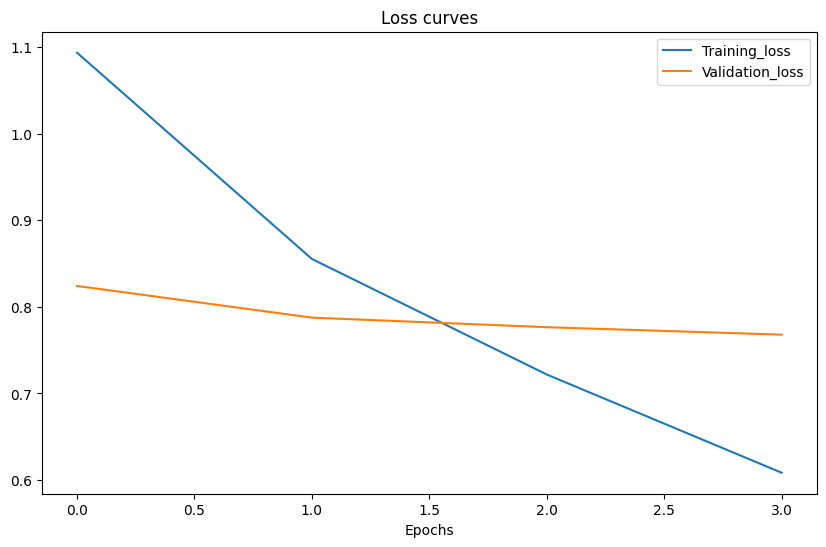

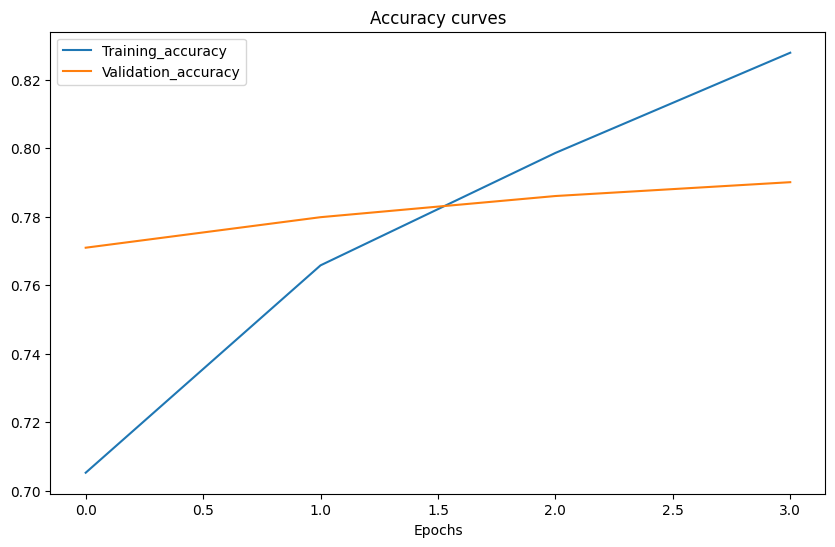

In [ ]:
history_0_fine_tuned=history_0_fine.history

plt.figure(figsize=(10,6))
plt.plot(history_0_fine_tuned["loss"],label="Training_loss")
plt.plot(history_0_fine_tuned["val_loss"],label="Validation_loss")
plt.title("Loss curves")
plt.xlabel("Epochs")
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(history_0_fine_tuned["accuracy"],label="Training_accuracy")
plt.plot(history_0_fine_tuned["val_accuracy"],label="Validation_accuracy")
plt.title("Accuracy curves")
plt.xlabel("Epochs")
plt.legend()

# 12.Evaluating the Fine_tuned model

In [ ]:
load_model_0_fine.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.7904 - loss: 0.7710


[0.7678318619728088, 0.790099024772644]

# 13.Making Prediction on Unseen images

In [ ]:
def unseen_image(path):
  img= tf.io.read_file(path)
  img= tf.io.decode_image(img,channels=3)
  img= tf.image.resize(img,size=(224, 224))
  img=tf.expand_dims(img,axis=0)
  return img

In [ ]:
image_0= unseen_image("/content/drive/MyDrive/Deep_Learning(Tuto)/101_Food_Classification/Images/Pizza_Margherita.jpg")
pred_image= load_model_0.predict(image_0)
pred_prob= np.argmax(pred_image)
pred_class= classes_name[pred_prob]

1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step


(np.float64(-0.5), np.float64(1199.5), np.float64(797.5), np.float64(-0.5))

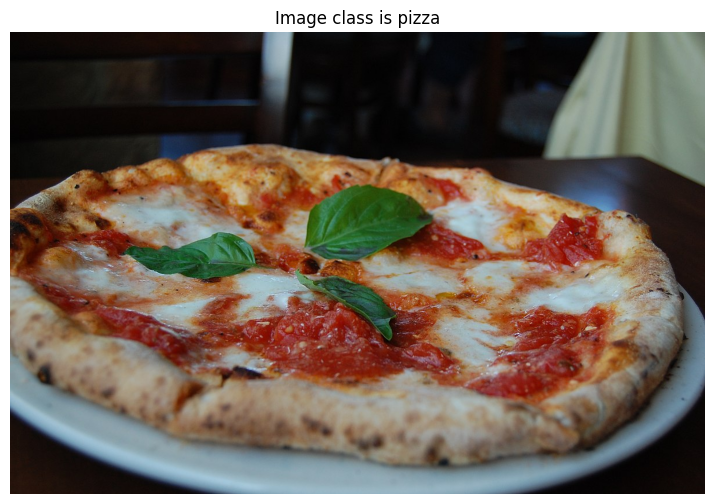

In [ ]:
plt.figure(figsize=(10, 6))
img= plt.imread("/content/drive/MyDrive/Deep_Learning(Tuto)/101_Food_Classification/Images/Pizza_Margherita.jpg")
plt.imshow(img)
plt.title(f"Image class is {pred_class}")
plt.axis(False)

In [ ]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True \
    --to notebook --inplace "/content/your_notebook.ipynb"
